# SVM and Faces Recognition

In [8]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

print(faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


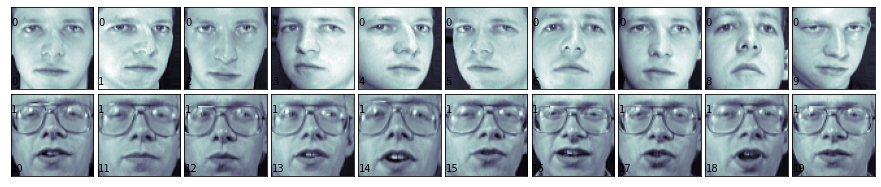

In [17]:
def print_faces(images, target, top_n):
    # Set up the figure size in inches
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
print_faces(faces.images, faces.target, 20)

In [32]:
# SVM

from sklearn.svm import SVC

svc_1 = SVC(kernel = "linear")


In [38]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)
print(len(y_train))

300


In [39]:
# Define a function to evaluate K-fold cross-validation

from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y):
    # create a k-fold cross validation iterator
    cv = KFold(shuffle = True, random_state=0)
    
    #Score
    scores = cross_val_score(clf,X,y,cv=cv)
    print(scores)
    
    print(f"Mean {np.mean(scores)} +/- {sem(scores)}")

evaluate_cross_validation(svc_1, X_train, y_train)

[0.93333333 0.86666667 0.91666667 0.93333333 0.91666667]
Mean 0.9133333333333334 +/- 0.012247448713915886


In [45]:
#function to perform training on the training set and evaluate the performance on the testing set

from sklearn import metrics

def train_and_evaluate(cfl, X_train, X_test, y_train, y_test):
    cfl.fit(X_train, y_train)
    
    print("Accuracy on training set:")
    print(cfl.score(X_train, y_train))
    print("Accuracy on testing set:")
    print(cfl.score(X_test, y_test))
    
    y_pred = cfl.predict(X_test)
    
    print("Classification Report: ")
    print(metrics.classification_report(y_test, y_pred))
    
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_pred))

In [46]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00        